# How to fit a 2D data set to a guassian curve
https://github.com/Ffisegydd/python-examples/blob/master/examples/scipy/fitting%20a%20gaussian%20with%20scipy%20curve_fit.py

In [5]:
"""
Practicing on how to fit a gaussian to data
"""
import random

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [9]:
#create function that returns a Gaussian (normal) distribution
def gauss(x, *p):
    a,b,c,d = p
    y = a*np.exp(-np.power((x - b), 2.)/(2.* c**2.)) + d # the d is moving it up or down
    
    return y

In [7]:
#chose some starting values for our and add some random noise to them
p_initial = [1.0,0.0,0.1,0.0]
p_perturbed = [i + 0.5*(random.random()*2 - 1) for i in p_initial]
print(p_perturbed)

N = 100 # Number of data points


[0.5827152001725842, 0.4615198634393197, -0.20376033929331014, 0.3392507347213567]


In [10]:
"""
Creates the data sets
x: just linear space from -1 to 1
y: takes the guassian function with the perturbed initial parameters and add more noise to it
error = makes a random number
"""

x = np.linspace(-1,1,N)
y = np.array([gauss(i,*p_perturbed) + 0.1*(random.random()*2. - 1.) for i in x])
e = np.array([random.random()*0.1 for _ in y])

In [12]:
#uses the curve fitting to get the fitting of the Gaussian
popt, pcov = curve_fit(gauss, x, y, p0=p_initial, sigma=e)
popt #the new parameters


array([-0.74895622, -0.38884372,  0.4072388 ,  0.91223894])

In [13]:
pcov

array([[ 1.75376035e-03,  9.39391899e-05,  1.83170636e-04,
        -2.31718378e-04],
       [ 9.39391899e-05,  8.20265512e-04, -7.67003440e-04,
        -3.18958581e-04],
       [ 1.83170636e-04, -7.67003440e-04,  1.46721455e-03,
         1.01017057e-03],
       [-2.31718378e-04, -3.18958581e-04,  1.01017057e-03,
         9.91680429e-04]])

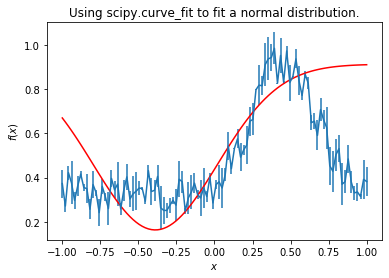

In [15]:
# Generate y-data based on the fit.
y_fit = gauss(x, *popt)

# Create a plot of our work, showing both the data and the fit.
fig, ax = plt.subplots()

ax.errorbar(x,y,e)
ax.plot(x, y_fit, color = 'red')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('Using scipy.curve_fit to fit a normal distribution.')

plt.show()

In [16]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N).  If None, then the
        init

In [ ]:
"""
curve_fit must take following parameters
    (first argument must be indepent variable,second must be the parameters):
1) Function of what you want the data to fit
2) The X and Y values
3) Optional guesses on what the paramters are
"""

# Fittingn 1D data to a Gaussian

In [ ]:
#what i can use for fitting the normal distribution to my 1D data
from scipy.stats import norm


In [19]:
datos = [4,4,4,4,4,5,6,4,4.5]
(mu, sigma) = norm.fit(datos)
print(mu)
print(np.mean(datos))

4.388888888888889
4.388888888888889


In [ ]:
"""
Conclusion, is very similar to the mean
"""